In [20]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xgb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df1 = pd.read_csv('./data/fraud_oracle.csv')
df1.head()
# df1.columns

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [11]:
df2 = pd.read_csv('./data/insurance_claims.csv')
df2.head()
df2.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [17]:
df = df1

count = df['FraudFound_P'].value_counts().reset_index()
count.columns = ['FraudFound_P', 'Count']
count

,FraudFound_P,Count
0,0,14497
1,1,923


/var/folders/pm/ps47mfm943x_nqjshcjsk5ch0000gn/T/ipykernel_57353/1407210759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Count', data=fraud_by_sex, palette='viridis')


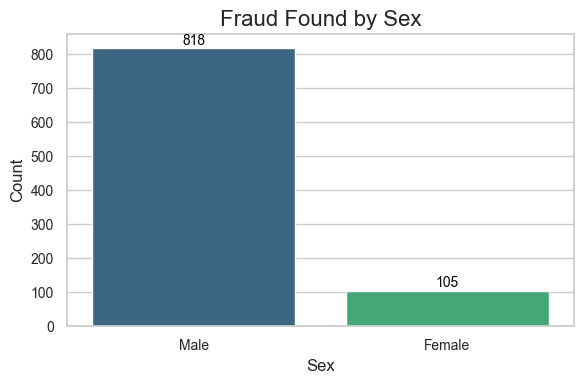

In [30]:
# Fraud counts by sex
fraud_by_sex = df[df['FraudFound_P'] == 1]['Sex'].value_counts().reset_index()
fraud_by_sex.columns = ['Sex', 'Count']

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Count', data=fraud_by_sex, palette='viridis')
plt.title('Fraud Found by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for index, row in fraud_by_sex.iterrows():
    plt.text(index, row['Count'] + 10, row['Count'], ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

/var/folders/pm/ps47mfm943x_nqjshcjsk5ch0000gn/T/ipykernel_57353/662184615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Count', data=fraud_by_age, palette='viridis')


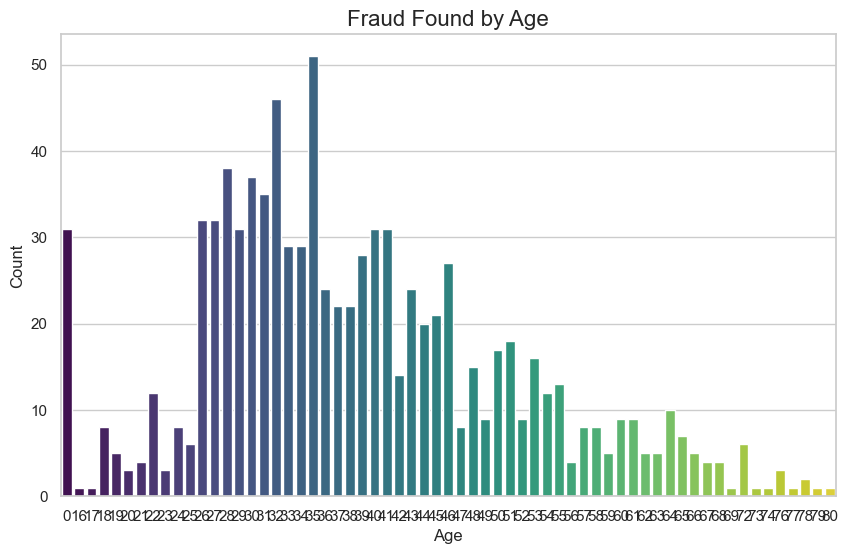

In [39]:
# by age
fraud_by_age = df[df['FraudFound_P'] == 1]['Age'].value_counts().reset_index()
fraud_by_age.columns = ['Age', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Count', data=fraud_by_age, palette='viridis')

plt.title('Fraud Found by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/var/folders/pm/ps47mfm943x_nqjshcjsk5ch0000gn/T/ipykernel_57353/3756585171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Make', y='Count', data=fraud_by_make, palette='viridis')


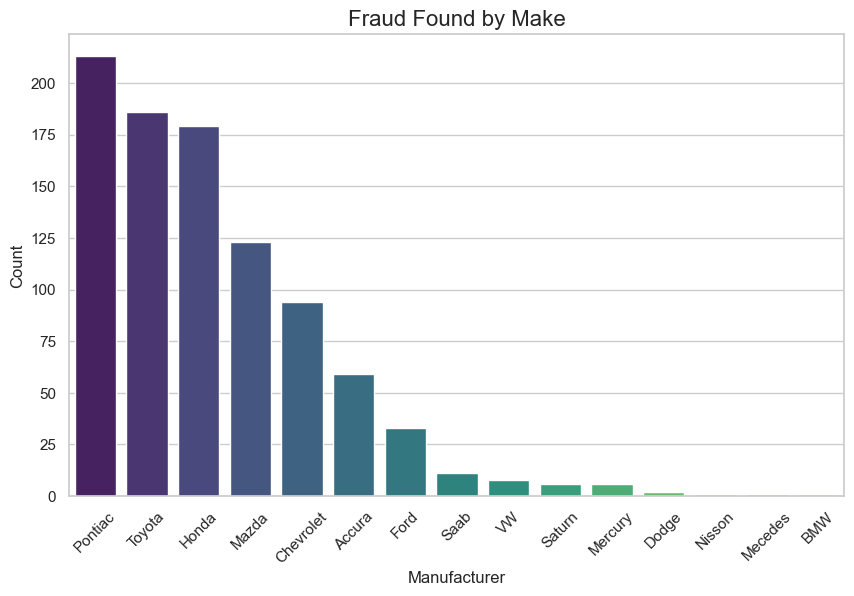

In [41]:
# by manufacturer
fraud_by_make = df[df['FraudFound_P'] == 1]['Make'].value_counts().reset_index()
fraud_by_make.columns = ['Make', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Count', data=fraud_by_make, palette='viridis')
plt.title('Fraud Found by Make', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

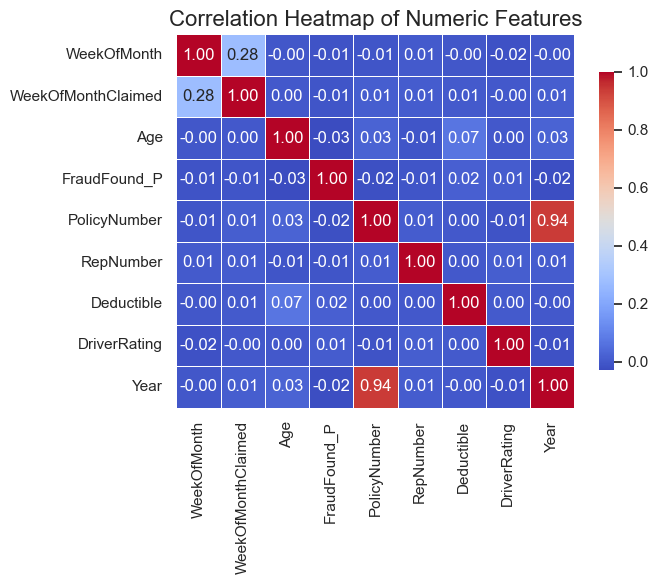

Features correlation with FraudFound_P:
FraudFound_P          1.000000
Deductible            0.017348
DriverRating          0.007266
WeekOfMonthClaimed   -0.005761
RepNumber            -0.007551
WeekOfMonth          -0.011861
PolicyNumber         -0.020345
Year                 -0.024760
Age                  -0.029741
Name: FraudFound_P, dtype: float64


In [48]:
# Create correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Create a heatmap of correlations
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, linewidths=0.5, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Extract the correlations with the target variable (FraudFound_P)
fraud_corr = correlation_matrix['FraudFound_P'].sort_values(ascending=False)
print("Features correlation with FraudFound_P:")
print(fraud_corr)

/var/folders/pm/ps47mfm943x_nqjshcjsk5ch0000gn/T/ipykernel_57353/2719815091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VehiclePrice', y='Count', data=fraud_by_vehicle_price, palette='viridis')


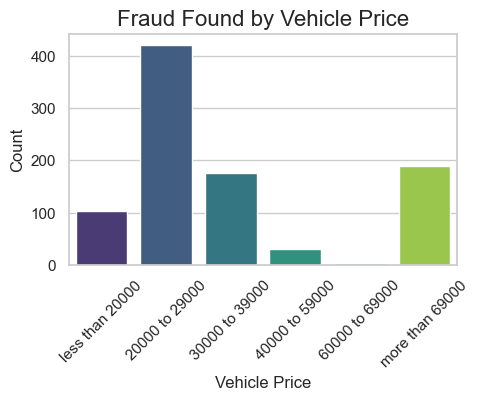

In [55]:
# by vehicle price
fraud_by_vehicle_price = df[df['FraudFound_P'] == 1]['VehiclePrice'].value_counts().reset_index()
fraud_by_vehicle_price.columns = ['VehiclePrice', 'Count']
order = ["less than 20000", "20000 to 29000", "30000 to 39000", "40000 to 59000", "60000 to 69000", "more than 69000"]
fraud_by_vehicle_price['VehiclePrice'] = pd.Categorical(fraud_by_vehicle_price['VehiclePrice'], categories=order, ordered=True)
fraud_by_vehicle_price = fraud_by_vehicle_price.sort_values('VehiclePrice')

plt.figure(figsize=(5, 3))
sns.barplot(x='VehiclePrice', y='Count', data=fraud_by_vehicle_price, palette='viridis')
plt.title('Fraud Found by Vehicle Price', fontsize=16)
plt.xlabel('Vehicle Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

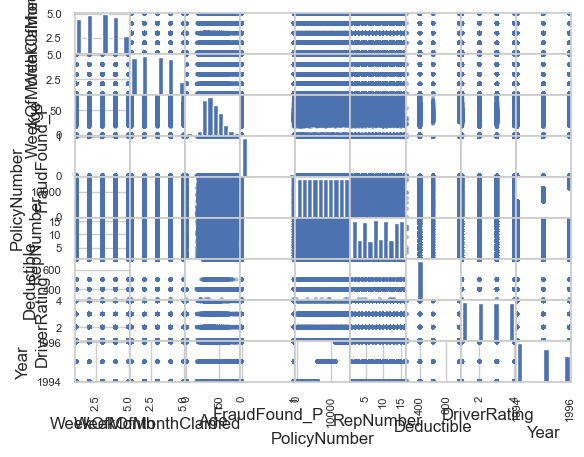

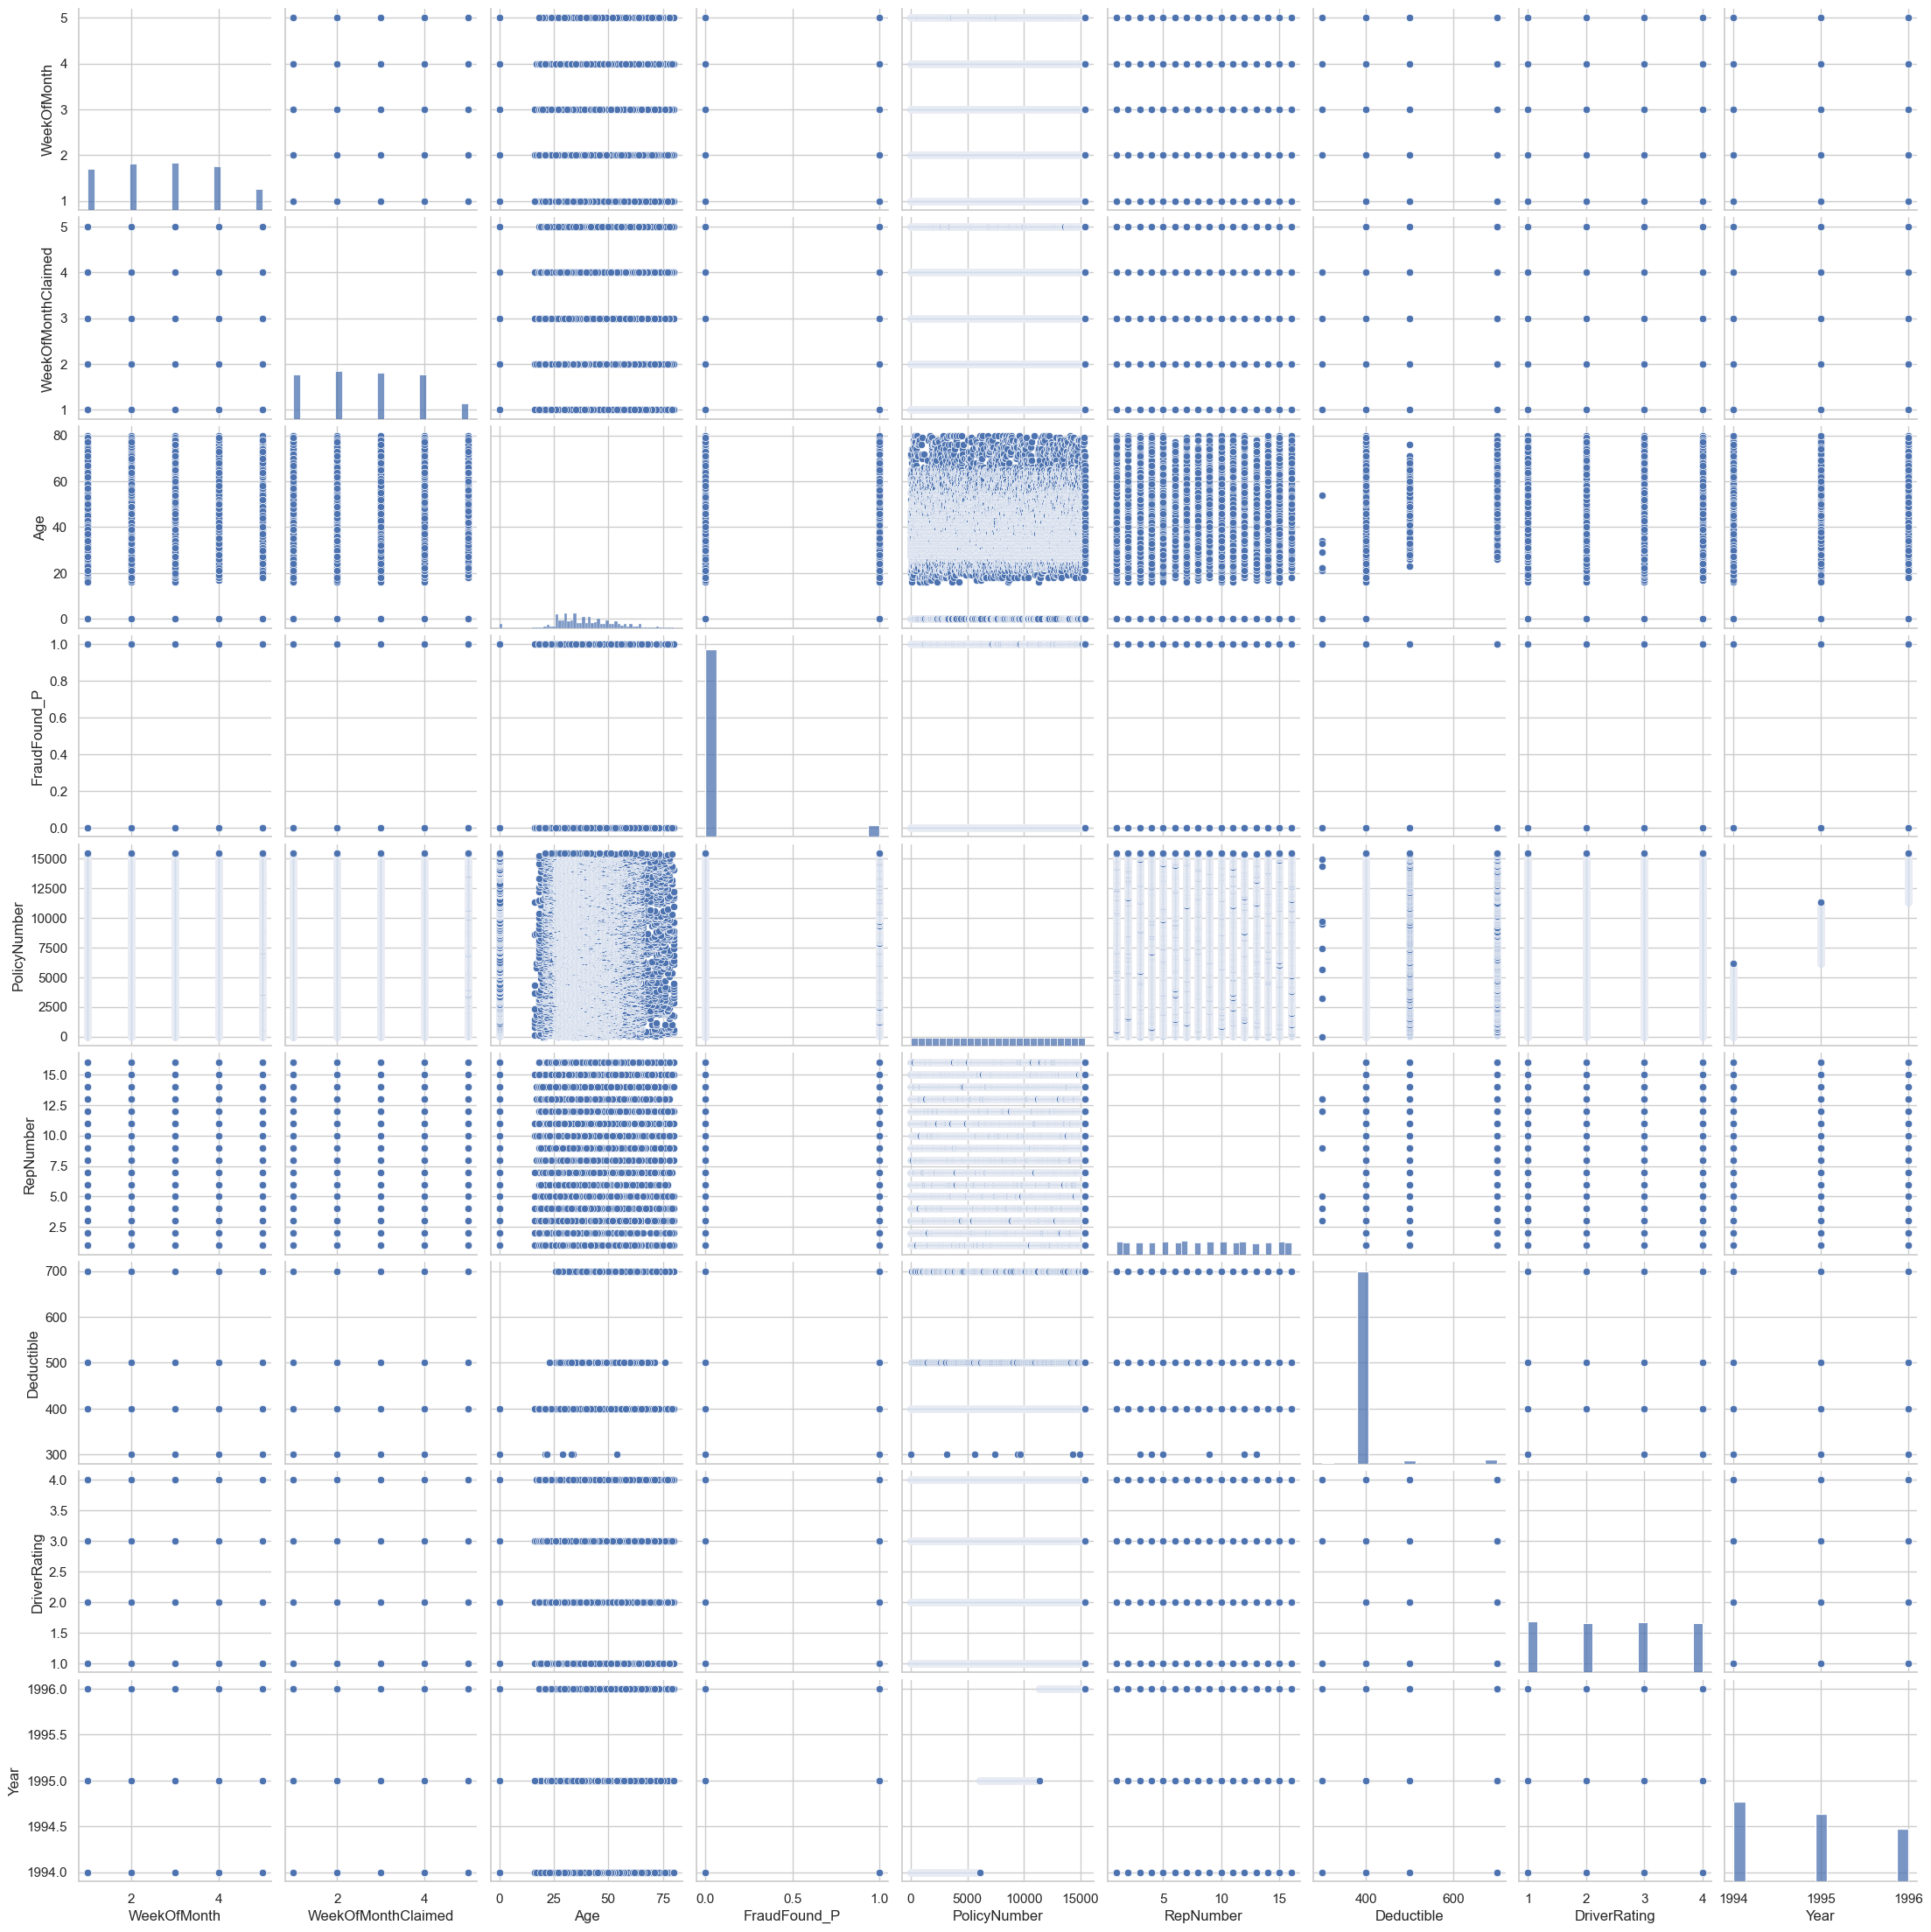

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, diagonal='hist')
sns.pairplot(df)

/var/folders/pm/ps47mfm943x_nqjshcjsk5ch0000gn/T/ipykernel_57353/1736284126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PolicyType', y='Count', data=fraud_by_policy, palette='viridis')


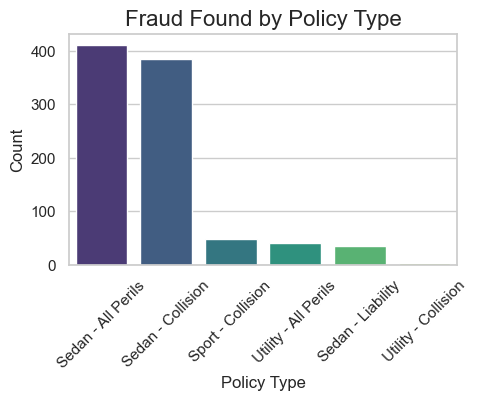

In [58]:
# by policy type
fraud_by_policy = df[df['FraudFound_P'] == 1]['PolicyType'].value_counts().reset_index()
fraud_by_policy.columns = ['PolicyType', 'Count']
plt.figure(figsize=(5, 3))
sns.barplot(x='PolicyType', y='Count', data=fraud_by_policy, palette='viridis')
plt.title('Fraud Found by Policy Type', fontsize=16)
plt.xlabel('Policy Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Transformando os dados

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_clean = df.copy()

# for bianry columns

binary_columns = [col for col in df_clean.columns if df_clean[col].nunique() == 2 and col != 'FraudFound_P']

print('binary cols: ', len(binary_columns))
print('Binary cols: ', binary_columns)

le = LabelEncoder()

for col  in binary_columns:
    df_clean[col] = le.fit_transform(df_clean[col])
    print('Label Mapping: ', dict(zip(le.classes_, le.transform(le.classes_))))

binary cols:  6
Binary cols:  ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
Label Mapping:  {'Rural': np.int64(0), 'Urban': np.int64(1)}
Label Mapping:  {'Female': np.int64(0), 'Male': np.int64(1)}
Label Mapping:  {'Policy Holder': np.int64(0), 'Third Party': np.int64(1)}
Label Mapping:  {'No': np.int64(0), 'Yes': np.int64(1)}
Label Mapping:  {'No': np.int64(0), 'Yes': np.int64(1)}
Label Mapping:  {'External': np.int64(0), 'Internal': np.int64(1)}


In [63]:
for col in ['VehiclePrice', 'DriverRating', 'AgeOfVehicle', 'BasePolicy']:
    print(f"The unique values in {col}: {df_clean[col].unique()}")


The unique values in VehiclePrice: ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
The unique values in DriverRating: [1 4 3 2]
The unique values in AgeOfVehicle: ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
The unique values in BasePolicy: ['Liability' 'Collision' 'All Perils']
